In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
bike_uci = pd.read_csv("day.csv")
print("bike_uciset loaded successfully!")
bike_uci.head() 

import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

bike_uciset loaded successfully!


In [3]:
#dropping unwanted columns only if they exist
cols_to_drop = ['instant', 'dteday', 'casual', 'registered']
if all(col in bike_uci.columns for col in cols_to_drop):
    bike_uci = bike_uci.drop(cols_to_drop, axis=1)

print("Columns after cleaning:", list(bike_uci.columns))


Columns after cleaning: ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']


In [4]:
print(bike_uci.info())
print("\nSummary Statistics:")
print(bike_uci.describe())

print("\nMissing Values:\n", bike_uci.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    int64  
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    int64  
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  cnt         731 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.7 KB
None

Summary Statistics:
           season          yr        mnth     holiday     weekday  workingday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     2.496580    0.500684    6.519836    0.028728    2.997264    0.683995   
s

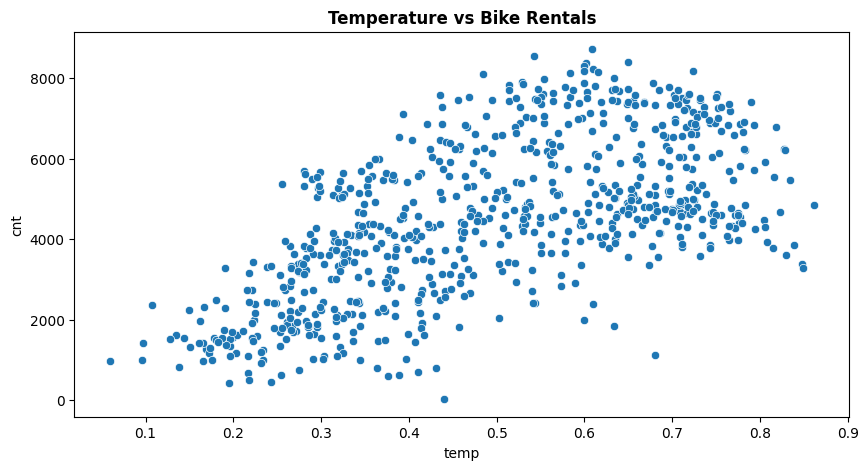

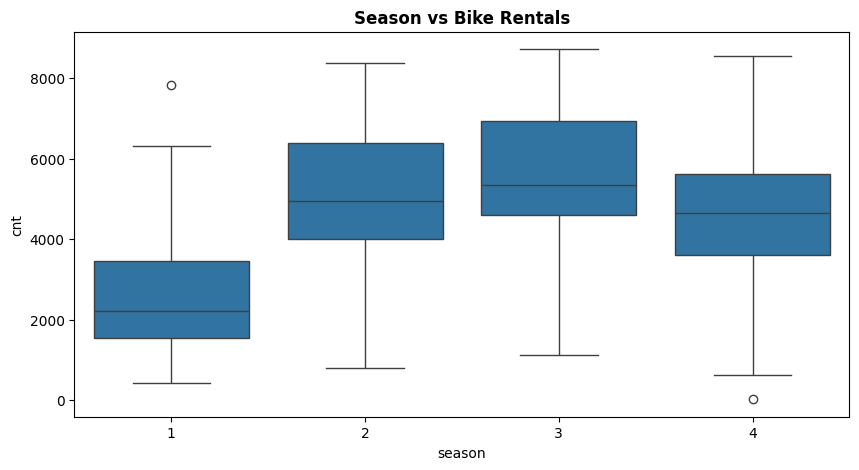

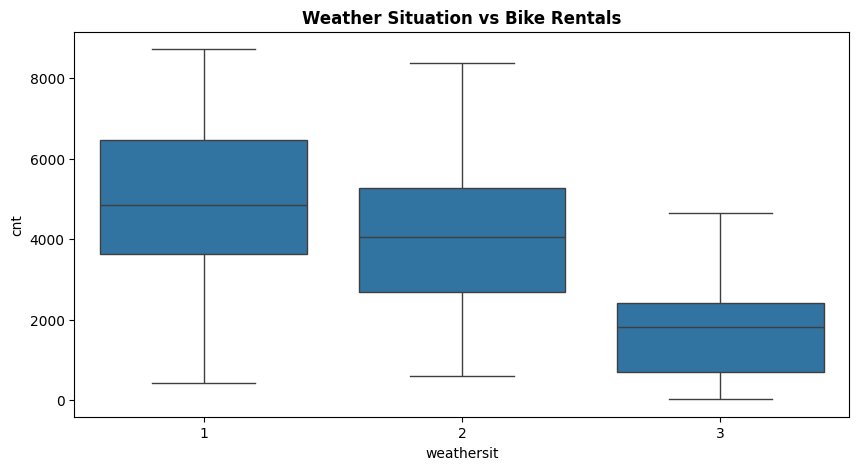

In [5]:
#visualising relationships
plt.figure(figsize=(10,5))
sns.scatterplot(x='temp', y='cnt', data=bike_uci)
plt.title('Temperature vs Bike Rentals', fontweight='bold')
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='season', y='cnt', data=bike_uci)
plt.title('Season vs Bike Rentals', fontweight='bold')
plt.show() 

plt.figure(figsize=(10,5))
sns.boxplot(x='weathersit', y='cnt', data=bike_uci)
plt.title('Weather Situation vs Bike Rentals',fontweight='bold')
plt.show()


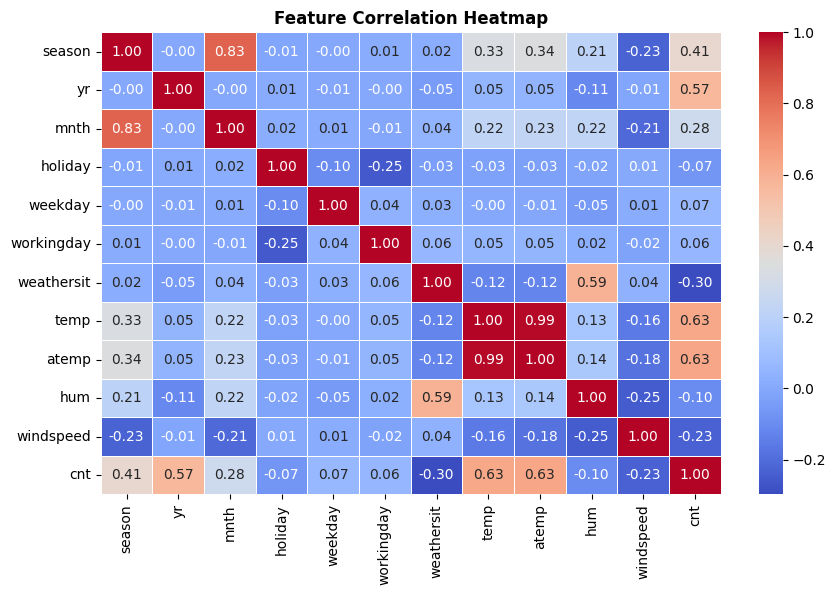


Top correlated features with 'cnt':
cnt           1.000000
atemp         0.631066
temp          0.627494
yr            0.566710
season        0.406100
mnth          0.279977
weekday       0.067443
workingday    0.061156
holiday      -0.068348
hum          -0.100659
windspeed    -0.234545
weathersit   -0.297391
Name: cnt, dtype: float64


In [6]:
#correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns

#computing correlation matrix
corr = bike_uci.corr(numeric_only=True)

#plotting correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontweight='bold')
plt.show()

#displaying top correlated features with bike count
print("\nTop correlated features with 'cnt':")
print(corr['cnt'].sort_values(ascending=False))


In [7]:
#preparing the data for modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#defining features (X) and target (y)
X = bike_uci.drop('cnt', axis=1)
y = bike_uci['cnt']

#splitting the bike_uci
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#normalising numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data prepared for modeling")
print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


Data prepared for modeling
Training set: (584, 11)
Test set: (147, 11)


In [8]:
#training a random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#initialising model
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)

#training
rf_model.fit(X_train_scaled, y_train)

#predicting
y_pred = rf_model.predict(X_test_scaled)

#evaluating
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Random Forest Performance:")
print(f"  Mean Squared Error: {mse:.2f}")
print(f"  R² Score: {r2:.3f}")


Random Forest Performance:
  Mean Squared Error: 451486.40
  R² Score: 0.887


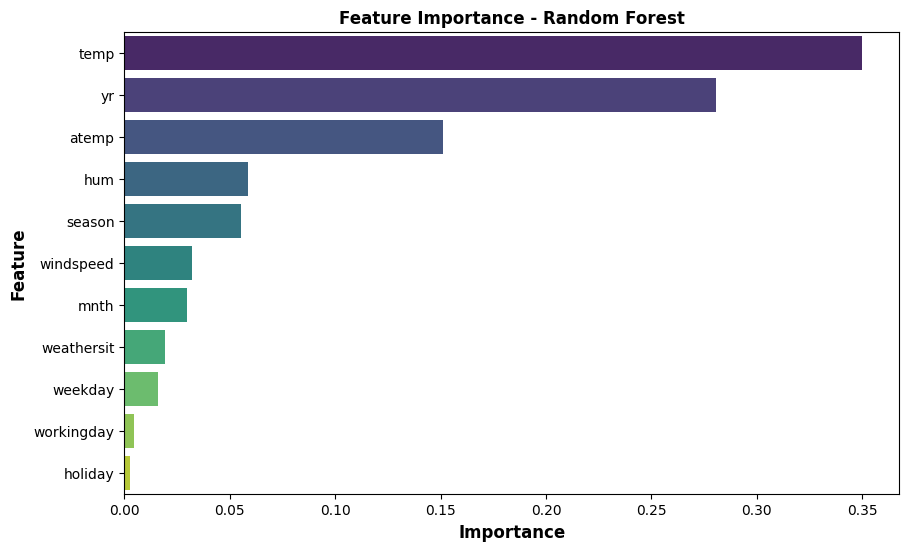

In [9]:
#feature importance
importances = rf_model.feature_importances_
feature_names = X.columns

#creating a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.xlabel('Importance', fontsize=12, fontweight='bold')
plt.ylabel('Feature', fontsize=12, fontweight='bold')
plt.title('Feature Importance - Random Forest', fontweight='bold')
plt.show()


In [10]:
#trying a gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor

#initialising model
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)

#training
gb_model.fit(X_train_scaled, y_train)

#predicting
y_pred_gb = gb_model.predict(X_test_scaled)

#evaluating
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Performance:")
print(f"  Mean Squared Error: {mse_gb:.2f}")
print(f"  R² Score: {r2_gb:.3f}")


Gradient Boosting Performance:
  Mean Squared Error: 456364.99
  R² Score: 0.886


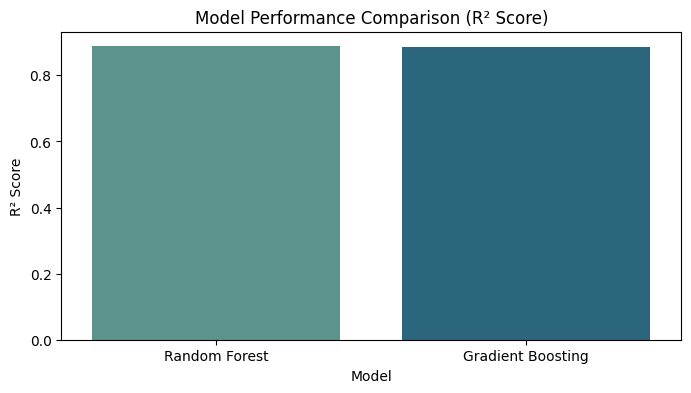

,Model,MSE,R² Score
0,Random Forest,451486.399975,0.887407
1,Gradient Boosting,456364.987435,0.886190


In [11]:
#comparing and visualising random forest and gradient boosting
comparison = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting'],
    'MSE': [mse, mse_gb],
    'R² Score': [r2, r2_gb]
})

plt.figure(figsize=(8,4))
sns.barplot(data=comparison, x='Model', y='R² Score', palette='crest')
plt.title('Model Performance Comparison (R² Score)')
plt.show()

comparison


In [12]:
#for fun: adding an interactive feature importance using plotly
import plotly.express as px

fig = px.bar(
    importance_df,
    x='Importance',
    y='Feature',
    orientation='h',
    title='Interactive Feature Importance (Random Forest)',
    color='Importance',
    color_continuous_scale='viridis'
)
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()


In [13]:
#hyperparameter tuning and optimization
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

#defining parameter grid
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2']
}

#initialising Randomized Search
rf_random = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    scoring='r2',
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

#run tuning
rf_random.fit(X_train_scaled, y_train)

#best parameters
print("Best Parameters for Random Forest:")
print(rf_random.best_params_)

#evaluating optimized model
best_rf = rf_random.best_estimator_
y_pred_best = best_rf.predict(X_test_scaled)

mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"\nOptimized Random Forest Performance:")
print(f"  Mean Squared Error: {mse_best:.2f}")
print(f"  R² Score: {r2_best:.3f}") 

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters for Random Forest:
{'max_depth': 16, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 445}

Optimized Random Forest Performance:
  Mean Squared Error: 504765.19
  R² Score: 0.874


In [14]:
#gradient boosting hyperparameter tuning
#because GBR takes longer to train, a smaller search space will be used
from scipy.stats import uniform

param_dist_gb = {
    'n_estimators': randint(100, 400),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

gb_random = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_distributions=param_dist_gb,
    n_iter=20,
    scoring='r2',
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

gb_random.fit(X_train_scaled, y_train)

print("Best Parameters for Gradient Boosting:")
print(gb_random.best_params_)

# Evaluate optimized model
best_gb = gb_random.best_estimator_
y_pred_gb_best = best_gb.predict(X_test_scaled)

mse_gb_best = mean_squared_error(y_test, y_pred_gb_best)
r2_gb_best = r2_score(y_test, y_pred_gb_best)

print(f"\nOptimized Gradient Boosting Performance:")
print(f"  Mean Squared Error: {mse_gb_best:.2f}")
print(f"  R² Score: {r2_gb_best:.3f}")


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters for Gradient Boosting:
{'learning_rate': 0.20664617716135766, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 234}

Optimized Gradient Boosting Performance:
  Mean Squared Error: 492193.23
  R² Score: 0.877


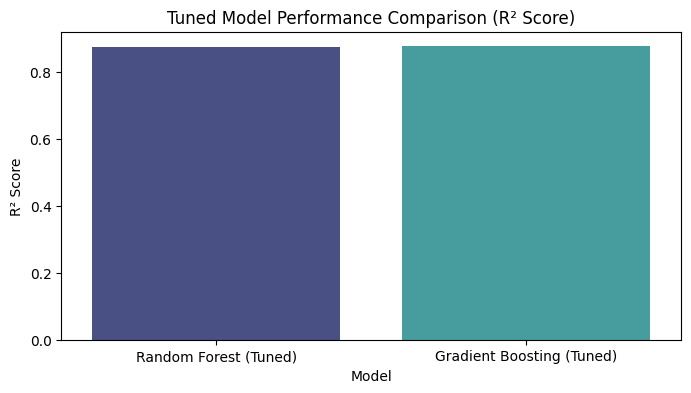

,Model,MSE,R² Score
0,Random Forest (Tuned),504765.193562,0.874120
1,Gradient Boosting (Tuned),492193.232637,0.877255


In [15]:
#comparing optimized models
comparison_optimized = pd.DataFrame({
    'Model': ['Random Forest (Tuned)', 'Gradient Boosting (Tuned)'],
    'MSE': [mse_best, mse_gb_best],
    'R² Score': [r2_best, r2_gb_best]
})

plt.figure(figsize=(8,4))
sns.barplot(data=comparison_optimized, x='Model', y='R² Score', palette='mako')
plt.title('Tuned Model Performance Comparison (R² Score)')
plt.show()

comparison_optimized


In [16]:
#saving the best model used to deploy later
import joblib

joblib.dump(best_rf, 'best_random_forest_model.pkl')
joblib.dump(best_gb, 'best_gradient_boosting_model.pkl')

print("Models saved successfully!")


Models saved successfully!
